In [308]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics
import re

In [309]:
# haal je huidige working directory op en pak de csv file
path = os.getcwd() + "/data/Google-Playstore.csv"

In [310]:
df = pd.read_csv(path)

In [311]:
# pak een n sample vd dataframe
df_s = df.sample(n=10000, random_state=123)

In [312]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [8]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [9]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [10]:
print(df.columns)

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')


In [313]:
df = df.drop(['Installs', 'Currency', 'Minimum Installs', 'Developer Website', 'Developer Email', 'Privacy Policy', 'App Name'], axis=1)

In [21]:
df.isnull().sum() / df.shape[0] * 100

App Id              0.000000
Category            0.000000
Rating              0.989345
Rating Count        0.989345
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Size                0.008474
Minimum Android     0.282324
Developer Id        0.001427
Released            3.071972
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
Scraped Time        0.000000
dtype: float64

In [7]:
plt.figure(figsize=(10,2))
# sns.histplot(df_s['Maximum Installs'])

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Maximum Installs', ylabel='Rating'>

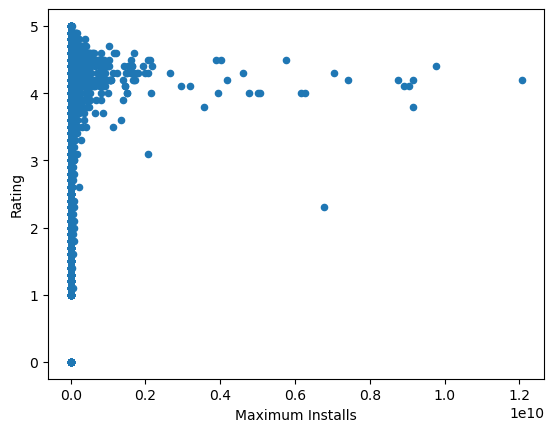

In [89]:
df.plot.scatter('Maximum Installs', 'Rating')

Text(0.5, 1.0, 'Distribution')

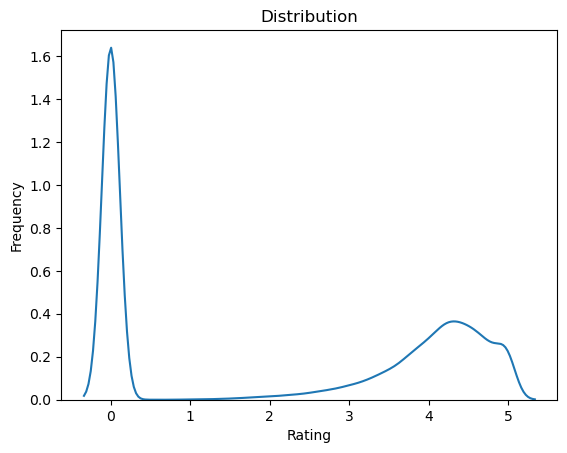

In [314]:
kde = sns.kdeplot(df['Rating'])
kde.set_xlabel("Rating")
kde.set_ylabel("Frequency")
plt.title('Distribution')


In [219]:
((df['Released'] == df['Last Updated']).sum()) / len(df.index) * 100

14.472853644532682

In [281]:
print(df[df['Released'].isnull()])

                                                 App Name  \
8                                               WhatsOpen   
66                                ChurchManagement (PLMT)   
115                                              VM-Delay   
210                                              Promotor   
230                             opti*Map ED (Deutschland)   
...                                                   ...   
2312847  Video Vault - Hide  or Lock Your  Private Videos   
2312862                                              Deus   
2312898                                         AppBundle   
2312907                                         Naandi CA   
2312939                                          大俠客—熱血歸來   

                                           App Id           Category  Rating  \
8                               com.whatsopen.app      Communication     0.0   
66                          fr.ekbz.churchManager       Productivity     0.0   
115                        

In [316]:
df['Released Year'] = pd.to_datetime(df_s['Released'], errors='ignore').apply(lambda date: date.year)
df['Last Updated Year'] = pd.to_datetime(df_s['Last Updated']).apply(lambda date: int(date.year))
df['Difference Year'] = df_s['Last Updated Year'] - df_s['Released Year']


**Code below is redunant**

In [317]:
grouped = df_s.groupby('Minimum Installs').median()

In [286]:
def fill_na_released(year_r, min_inst):
    if pd.isna(year_r):
        return int(grouped.loc[min_inst]['Last Updated Year'] - grouped.loc[min_inst]['Difference Year'])
    else:
        return (int(year_r))

In [287]:
df_s['Released Year New'] = df_s.apply(lambda x: fill_na_released(x['Released Year'], x['Minimum Installs']), 
                        axis=1)

In [289]:
((df_s['Released Year New'] == df_s['Last Updated Year']).sum()) / len(df_s.index)

0.504

In [ ]:
((df_s['Released Year'] == df_s['Last Updated Year']).sum()) / len(df_s.index)

**Code above is redunant**

In [319]:
df.Category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

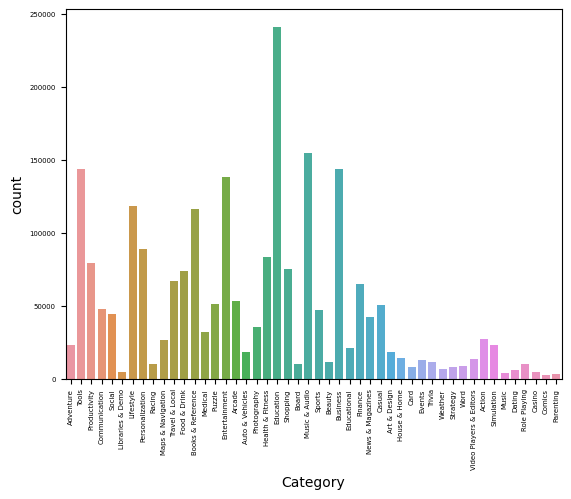

In [320]:
sns.countplot(data=df, x="Category")
plt.xticks(rotation=90)  
plt.tick_params(labelsize=5)

In [323]:
((df_s['Released Year'] == df_s['Last Updated Year']).sum()) / len(df_s.index)

0.497

In [214]:
df_s.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Released Year,Last Updated Year,Difference Year,Rating Bins
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,2020,2020,0,1
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,2020,2021,1,5
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,2020,2018,-2,1
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35,2018,2019,1,1
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,2019,2020,1,5


Index voor app id 

In [90]:
# waarden pakken boven 1% & onder de 99%
q1, q2 = .01, .99
filtered_df = df["Maximum Installs"].quantile([q1, q2])
filtered_df = df[(df['Maximum Installs'] > filtered_df[q1]) & (df['Maximum Installs'] < filtered_df[q2])]

In [93]:
# checken of er onrealistische ratings zijn
((df['Rating'] < 0) | (df['Rating'] > 5)).sum()

0

In [324]:
# maak bins voor de ratings
df['Rating Bin'] = pd.cut(df['Rating'],bins=[-0.1,1,2,3,4,5], labels=[1,2,3,4,5])


**Alvast even wat baselines testen**

In [325]:
df_no_na = df.dropna()
x = df_no_na[['Rating Count', 'Maximum Installs', 'Price', 'Free', 'Editors Choice', 'Editors Choice', 'In App Purchases']].values
y = df_no_na['Rating Bin'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [326]:
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)
scaled_X_train = scaler.transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [150]:
# deze data was met maximum installs als y & zonder rating bins in x
reg = LinearRegression().fit(x_train, y_train)

In [135]:
preds = reg.predict(x_test)

In [136]:
mae = metrics.mean_absolute_error(y_test, preds)
mse = metrics.mean_squared_error(y_test, preds)
r2 = metrics.r2_score(y_test, preds)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MAE is 359466.93482801167
MSE is 397824314995347.25
R2 score is 0.32364999262864824


In [327]:
c = LogisticRegression().fit(x_train, y_train)

In [328]:
preds = c.predict(x_test)

In [329]:
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy score is {}'.format(accuracy))

Accuracy score is 0.3288590604026846


In [330]:
print(metrics.confusion_matrix(y_test, preds))

[[ 16   0  55  71 798]
 [  0   0   0   1   9]
 [  0   0   0   3  78]
 [  0   0   0   8 274]
 [  0   0   0  11 613]]
